The purpose of the opening EDA portion is to format a dataframe with movie titles and monetary data, as the SQL IMDB database does not have information on money. Then create a column of net profit and return on investment (ROI).

Might need to take out a few more outliers on ROI for graphing purposes later on.

The plan is to merge this table with the SQL database to get monetary data on movies with best rating, certain actors, runtime length, etc. Merge on movie name for a specific subset from the SQL dataframes that will be made.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df =(pd.read_csv('zippedData/tn.movie_budgets.csv.gz', delimiter=','))
df.iloc[2998:3005]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2998,99,"Dec 8, 2000","Crouching Tiger, Hidden Dragon","$15,000,000","$128,067,808","$213,514,672"
2999,100,"Dec 9, 1988",Twins,"$15,000,000","$111,936,388","$216,600,000"
3000,1,"Dec 20, 1996",Scream,"$15,000,000","$103,046,663","$173,046,663"
3001,2,"Aug 11, 2017",Annabelle: Creation,"$15,000,000","$102,092,201","$305,384,865"
3002,3,"Oct 25, 2013",Jackass Presents: Bad Grandpa,"$15,000,000","$102,003,019","$160,903,019"
3003,4,"Jun 28, 1978",Heaven Can Wait,"$15,000,000","$98,800,000","$98,800,000"
3004,5,"Dec 18, 1985",The Color Purple,"$15,000,000","$93,589,701","$93,589,701"


In [3]:
df['worldwide_gross'] = df['worldwide_gross'].apply(lambda x: x.replace(",", ""))
df['worldwide_gross'] = df['worldwide_gross'].apply(lambda x: x.replace("$", ""))
df['worldwide_gross'] = df['worldwide_gross'].apply(lambda x: int(x))

df['domestic_gross'] = df['domestic_gross'].apply(lambda x: x.replace(",", ""))
df['domestic_gross'] = df['domestic_gross'].apply(lambda x: x.replace("$", ""))
df['domestic_gross'] = df['domestic_gross'].apply(lambda x: int(x))

df['production_budget'] = df['production_budget'].apply(lambda x: x.replace(",", ""))
df['production_budget'] = df['production_budget'].apply(lambda x: x.replace("$", ""))
df['production_budget'] = df['production_budget'].apply(lambda x: int(x))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [4]:
df['net_profit'] = df['worldwide_gross'] - df['production_budget']

df['roi'] = (df['net_profit'] / df['production_budget']) * 100

In [5]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636


In [6]:
print(df[('production_budget')].mean())
print(df[('production_budget')].median())


31587757.0965064
17000000.0


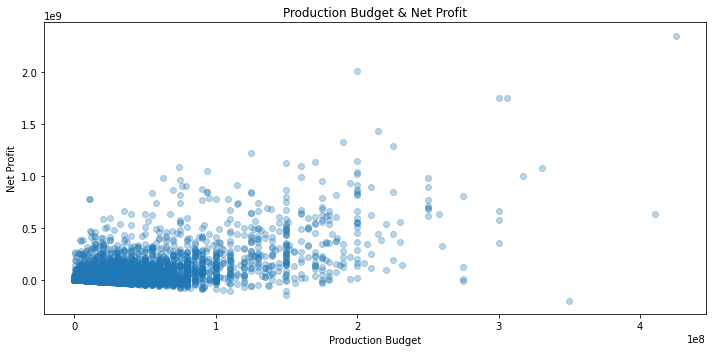

In [7]:
fig, ax = plt.subplots(figsize=(10,5))

#by default, line plot. First argument is X list/array.
# Second argument is Y list/array.
ax.scatter(df["production_budget"], df["net_profit"], alpha = 0.3) 

ax.set_xlabel('Production Budget')
ax.set_ylabel('Net Profit')
ax.set_title('Production Budget & Net Profit')

plt.tight_layout()
plt.show()

In [8]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636


In [9]:
df.to_csv('movie_budgets_roi.csv')